# $\text{Pr\'{a}ctica 2}$
## $\text{Laboratorio de Reducci\'{o}n de Datos}$</p>$\text{Daniel Enríquez 202308323 }$</p>$\text{22 de abril de 2025}$

## $\text{Resumen}$

A través del siguiente laboratorio se realiza el estudio de dos distribuciones de datos utilizando las medidas básicas de dispersión de la estadística descriptiva, hayándose que con dicho estudio, las especificaciones proporcionadas por el fabricante y los resultados se contradicen entre sí; sin embargo, se están dentro de ciertos intervalos. Más allá, puede que las mediciones realizadas a priori estén malas...

## $\text{Objetivos}$

- Aplicar ciclos iterativos, paquetes para graficación, trata de datos y manipulación de tales.
- Comprobar la vericidad de las especificaciones del dispositivo.
- Comprender los resultados estadísticos.

## $\text{Marco Te\'{o}rico}$

#### $\rightarrow \text{Media} \leftarrow$

Representa el valor promedio de los datos y se calcula sumando todos los valores y dividiéndolos por el número total de observaciones. La media es útil para obtener una visión general de la magnitud típica de los valores en un conjunto de datos. (Economipedia., s.f.)
$$
\mu=\sum{\frac{x_i}{n}\,_{(1)}}
$$

#### $\rightarrow \text{Desviaci\'{o}n Est\'{a}ndar}\leftarrow$

Mide la variabilidad o dispersión de los datos alrededor de la media. Es crucial para evaluar la variabilidad de los datos. (SAS Institute Inc., s.f.)
$$
\sigma=\sqrt{\frac{\sum(x_i-\mu)^2}{n}}\,_{(2)}
$$

#### $\rightarrow \text{SEM (Error Est\'{a}ndar de la Media)} \leftarrow$

El Error Estándar de la Media (SEM) es una medida que describe cuán precisamente la media de una muestra representa la media de la población general. 
El SEM se calcula dividiendo la desviación estándar de la muestra por la raíz cuadrada del número de observaciones en la muestra. (INTEF., s.f.)
$$
SEM = \frac{\sigma}{\sqrt{n}}\, _{(3)}
$$

#### $\rightarrow \text{Error Absoluto Medio (MAE)} \leftarrow$

Medida para cuantificar la precisión de un conjunto de predicciones con los valores reales. (Wikipedia., 2024)

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n}|x_i-\hat{x_i}|_{(4)}
$$

#### $\rightarrow \text{Intervalo de Confianza}\leftarrow$

Rango dentro del cual hay probabilidad (de acuerdo al porcentaje establecido), de encontrar la media de una muestra. (Wikipedia., n.d.)

$$
ME = z \cdot\frac{\sigma}{\sqrt{n}}_{5}
$$





## $\text{Diseño Experimental}$

#### $\rightarrow\text{Procedimiento}\leftarrow$

1. Medir la distancia real con un regla.
2. Utilizar el Sensor Ultrasónico HC-SR04 para realizar las mediciones.
3. Guardar las mediciones en un archivo .CSV.
4. Extraer la data.
5. Calcular las medidas de dispersión para ambas mediciones.
6. Gráficar.


## $\text{Resultados y Discusi\'{o}n de Resultados}$

### $\rightarrow \text{ Resultados } \leftarrow$

In [99]:
## Importación de Paquetes y Librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats
from scipy.stats import shapiro

In [96]:
## Cargando la data a DataFrames

data1 = pd.read_csv('sensor_readings_202504210537_daniel_26cm.csv')
data2 = pd.read_csv('sensor_readings_202504210510_daniel_34cm.csv')
distancia1 = data1['distance_cm']
distancia2 = data2['distance_cm']

In [69]:
## Calculando Medias y STD's de la Data para posterior almacenaje en arreglos

media1 = distancia1.mean()
media2 = distancia2.mean()

std1 = distancia1.std()
std2 = distancia2.std()

distancias = [distancia1, distancia2]
medias = [media1, media2]
stds = [std1, std2]
datuca = ["26 cm", "34cm"]

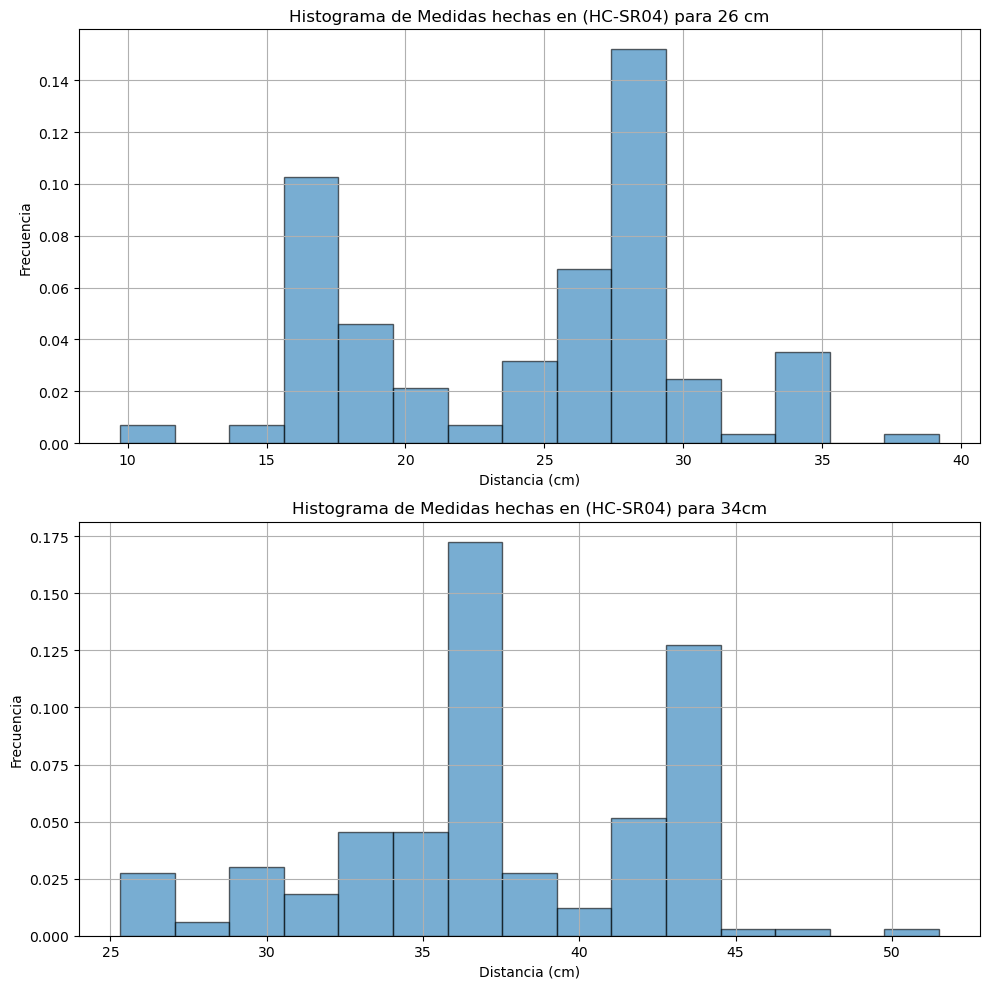

In [70]:
## Histogramas de los Datos

fig, axes = plt.subplots(2, 1, figsize=(10, 10))
axes = axes.flatten()

for i, dist in enumerate(distancias):  # Enumerar las columnas numéricas
    axes[i].hist(dist, bins=15, density=True, edgecolor='black', alpha=0.6)
    axes[i].set_title(f"Histograma de Medidas hechas en (HC-SR04) para {datuca[i]}")
    axes[i].set_xlabel("Distancia (cm)")
    axes[i].set_ylabel("Frecuencia")
    axes[i].grid(True)
    
plt.tight_layout()
plt.show()

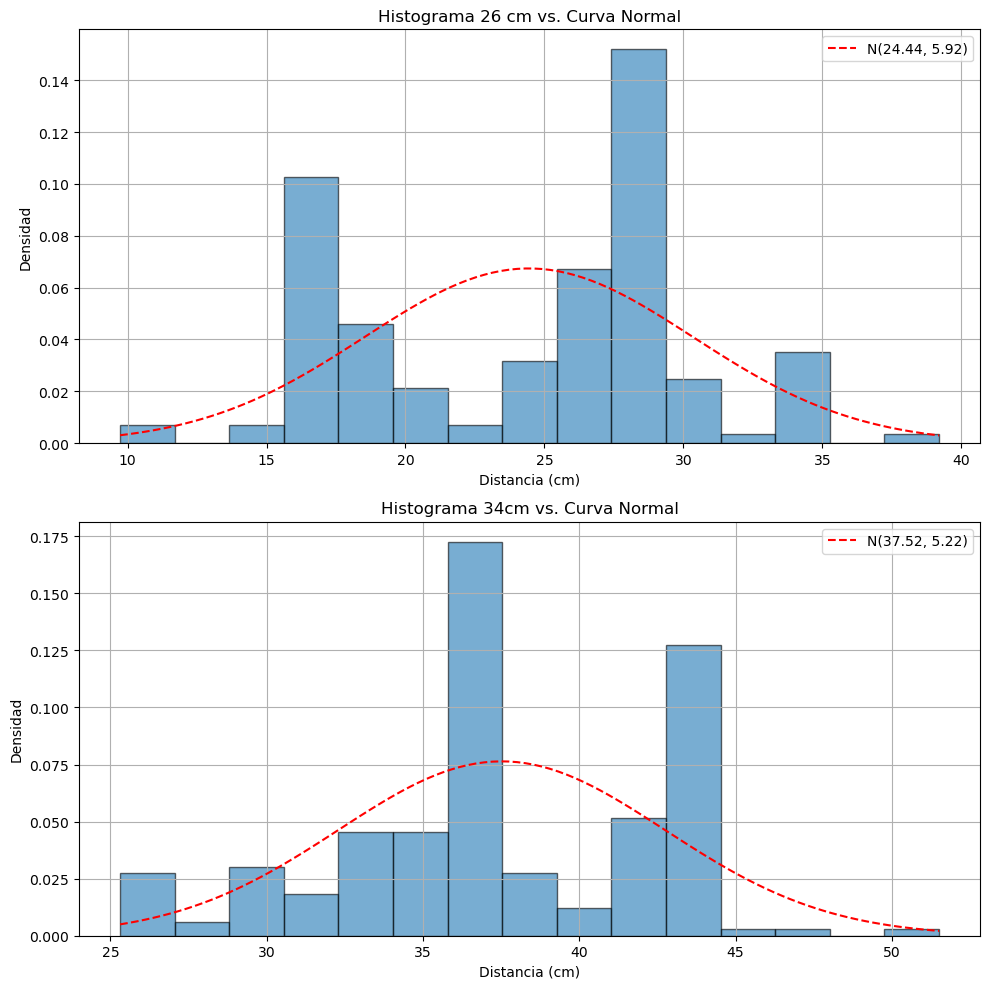

In [72]:
## Histogramas de la data contra Distribuciones Normales

fig, axes = plt.subplots(2, 1, figsize=(10, 10))
axes = axes.flatten()

x1 = np.linspace(min(distancia1), max(distancia1), 100)
x2 = np.linspace(min(distancia2), max(distancia2), 100)
xs = [x1, x2]

for i, dist in enumerate(distancias):  # Enumerar las distancias
    axes[i].hist(dist, bins=15, density=True, alpha=0.6, edgecolor='black')
    axes[i].plot(xs[i], norm.pdf(xs[i], medias[i], stds[i]), 'r--', label=f'N({medias[i]:.2f}, {stds[i]:.2f})')
    axes[i].set_title(f"Histograma {datuca[i]} vs. Curva Normal")
    axes[i].set_xlabel("Distancia (cm)")
    axes[i].set_ylabel("Densidad")
    axes[i].grid(True)
    axes[i].legend()  # Asegurar que cada subplot tenga su leyenda

plt.tight_layout()
plt.show()


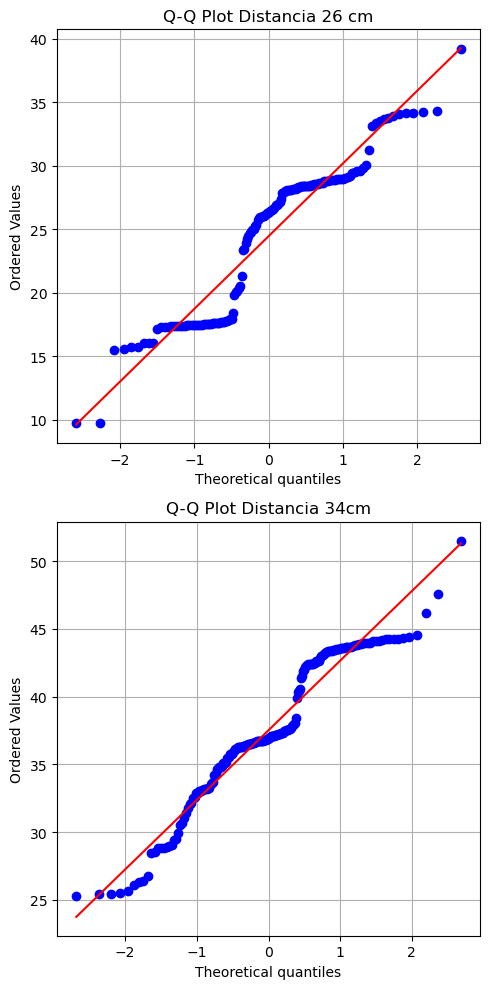

In [98]:
## Gráficas de Cuantiles de los Datos

fig, axes = plt.subplots(2, 1, figsize=(5, 10))
axes = axes.flatten()

for i, dist in enumerate(distancias):
    stats.probplot(dist, dist="norm", plot=axes[i])  
    axes[i].set_title(f"Q-Q Plot Distancia {datuca[i]}") 
    axes[i].grid(True)

plt.tight_layout()
plt.show()


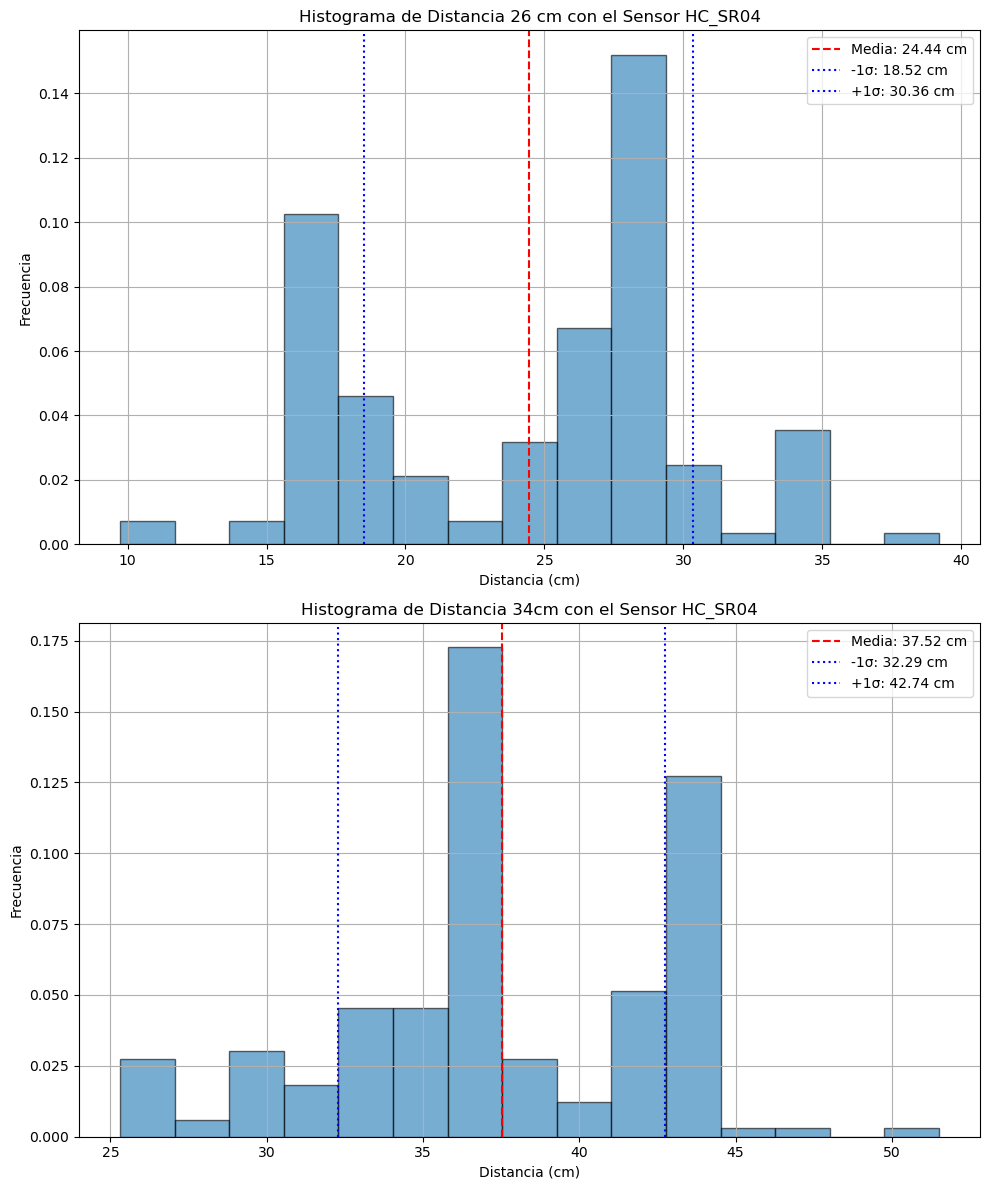

In [97]:
## Distribuciones con Medias y Errores

fig, axes = plt.subplots(2, 1, figsize=(10, 12))  
axes = axes.flatten()

for i, dist in enumerate(distancias):

    axes[i].hist(dist, bins=15, density=True, edgecolor='black', alpha=0.6)

    axes[i].axvline(medias[i], color='red', linestyle='--', label=f'Media: {medias[i]:.2f} cm')
    axes[i].axvline(medias[i] - stds[i], color='blue', linestyle=':', label=f'-1σ: {medias[i] - stds[i]:.2f} cm')
    axes[i].axvline(medias[i] + stds[i], color='blue', linestyle=':', label=f'+1σ: {medias[i] + stds[i]:.2f} cm')

    axes[i].set_title(f"Histograma de Distancia {datuca[i]} con el Sensor HC_SR04")
    axes[i].set_xlabel("Distancia (cm)")
    axes[i].set_ylabel("Frecuencia")
    axes[i].grid(True)
    axes[i].legend()


plt.tight_layout()
plt.show()

In [77]:
## Cálculo del Error Absoluto Medio 

x_reales = [26,34]
errores = [[],[]]
mae = [[],[]]

for i, columna in enumerate(distancias):
   errores[i] = [abs(x_reales[i] - x_medido) for x_medido in columna]
   mae[i] = np.mean(errores[i])
   print(f"Distancia Real Medición {i+1}: {x_reales[i]} cm")
   print(f"Error Medio Absoluto (MAE) {i+1}: {mae[i]:.3f} cm")
   print(f"Desviación Estándar {i+1}: {stds[i]:.3f} cm")


Distancia Real Medición 1: 26 cm
Error Medio Absoluto (MAE) 1: 4.931 cm
Desviación Estándar 1: 5.920 cm
Distancia Real Medición 2: 34 cm
Error Medio Absoluto (MAE) 2: 5.201 cm
Desviación Estándar 2: 5.223 cm


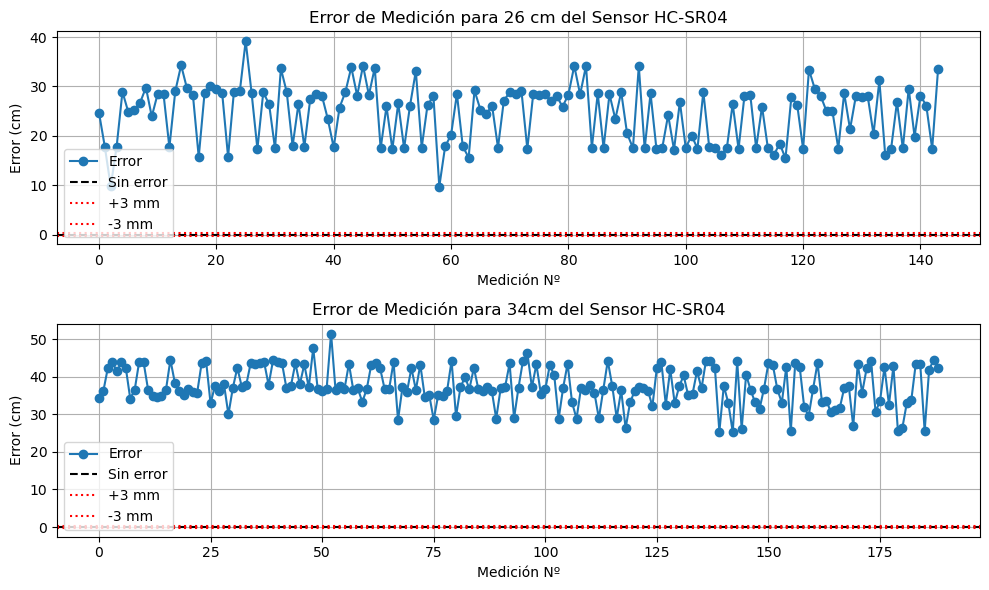

In [79]:
## Distribución de los Errores

fig, axes = plt.subplots(2, 1, figsize=(10, 6))  # Ajusta el número de filas si tienes más distribuciones
axes = axes.flatten()

for i, dist in enumerate(distancias):

    # Crear histograma
    axes[i].plot(dist, marker='o', linestyle='-', label="Error")
    axes[i].axhline(0, color='black', linestyle='--', label="Sin error")
    axes[i].axhline(0.3, color='red', linestyle=':', label="+3 mm")
    axes[i].axhline(-0.3, color='red', linestyle=':', label="-3 mm")

    axes[i].set_title(f"Error de Medición para {datuca[i]} del Sensor HC-SR04")
    axes[i].set_xlabel("Medición Nº")
    axes[i].set_ylabel("Error (cm)")
    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout()
plt.show()

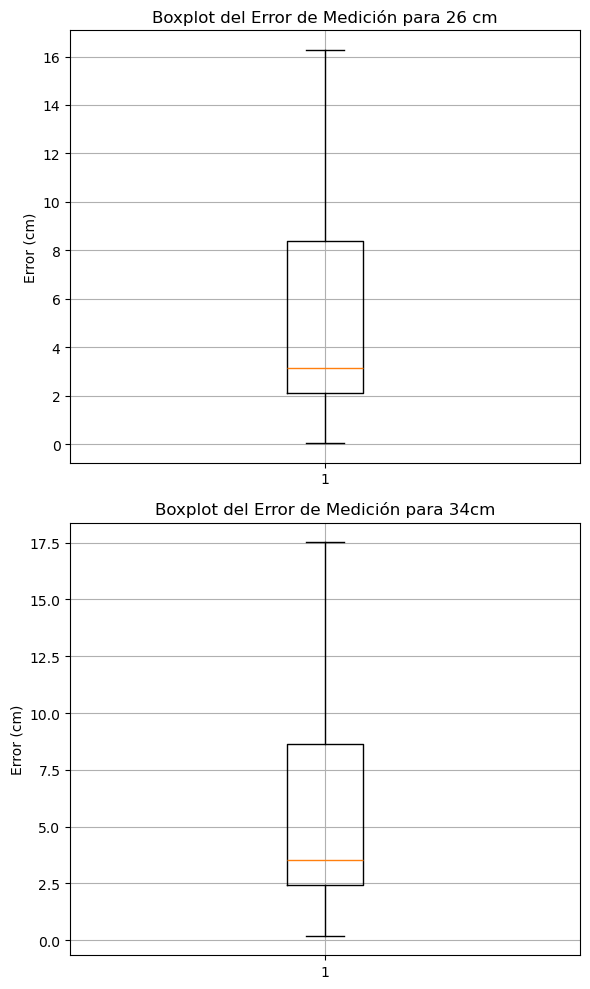

In [80]:
## Boxplot de la Data

fig, axes = plt.subplots(2, 1, figsize=(6,10)) 

for i, dist in enumerate(distancias):
    axes[i].boxplot(errores[i], vert=True)
    axes[i].set_title(f"Boxplot del Error de Medición para {datuca[i]}")
    axes[i].set_ylabel(f"Error (cm)")
    axes[i].grid(True)


plt.tight_layout()
plt.show()

In [113]:
## Intervalo de Confianza

z = norm.ppf(0.975)
me = [0,0]
ci_lower = [0,0]
ci_upper = [0,0]
err = [0,0]

for i, distancia in enumerate(distancias):
    me[i] = (z*stds[i]/np.sqrt(len(distancias[i])))
    ci_lower[i] = medias[i] - me[i]
    ci_upper[i] = medias[i] + me[i]
    err[i] = (stds[i]/medias[i])*100

    print(f"Media {datuca[i]}: {medias[i]:.2f} cm")
    print(f"Desviación Estándar {datuca[i]}: {stds[i]:.2f} cm")
    print(f"N: {len(distancias[i])}")
    print(f"Margen de Error (95%): ±{me[i]:.2f}%")
    print(f"Intervalo de Confianza al 95%: [{ci_lower[i]:.2f} cm, {ci_upper[i]:.2f} cm]")
    print(f"Error Relativo {datuca[i]}: {err[i]:.2f}%")
    print(f"")

Media 26 cm: 24.44 cm
Desviación Estándar 26 cm: 5.92 cm
N: 144
Margen de Error (95%): ±0.97%
Intervalo de Confianza al 95%: [23.47 cm, 25.40 cm]
Error Relativo 26 cm: 24.22%

Media 34cm: 37.52 cm
Desviación Estándar 34cm: 5.22 cm
N: 189
Margen de Error (95%): ±0.74%
Intervalo de Confianza al 95%: [36.77 cm, 38.26 cm]
Error Relativo 34cm: 13.92%



### $\rightarrow \text{Discusi\'{o}n de Resultados} \leftarrow$

Observemos como nuestras medias son cercanas a los supuestos valores reales medidos; al realizar los histogramas respectivos de nuestras mediciones podemos ver, con la gráfica 2, el claro apego a una distribución normal por ambas mediciones, indicando que valores cercanos a la media son justo los más repetidos en las mediciones (aunque el de $36$ cm pareciera ser el más apegado).

Luego, notamos como las correlaciones con los cuartiles son apegados y a pesar de haber variación, se ve como claramente los valores entre cuartiles son apegados a distribuciones teóricas, indicando que venimos en buen camino.

Luego vemos que los histogramas ploteados con las medias e incertidumbres incluyen los supuestos valores reales medidos, que nos da cierta valía para nuestras mediciones aunque sin embargo, notamos que tenemos un error relativo de $24.22%$ para la primera medición, y de un $13.92%$ para la segunda medición, indicando que tenemos una significante parte de dispersión alrededor del supuesto valor central medido (percatémonos a más, que la primera medición es más ruidosa que la segunda), como se menciono con anterioridad.

Seguidamente hacemos una gráfica en la que relacionamos el error intrínseco al medidor, con los obtenidos, notando una clara y muy significante diferencia, saliéndonos totalmente de lo estipulado por el fabricante, abriendo la pregunta si realmente es preciso el medidor ultrasónico, o realizamos nuestras medidas "reales" malas; ¿o condiciones atmosféricas interferentes a la medición?

Finalmente vemos como en el boxplots tenemos errores realmente altos, más que sin embargo inclusionan a las medias y los valores medidos, a pesar de ser un intervalo bastante amplio; tenemos dentro de tales valores.

Finalmente vemos como el $95%$ de nuestras primeras mediciones se encuentran contenidas dentro de $23.47-25.40$ cm, y las segundas entre $36.77-38.26$ cm, que no incluyen al valor medido. 

Con esto concluimos, que probablemente no realizamos adecuadas medicones reales, por haber sido tan vagas, ya que, si tomamos en cuenta las mediciones realizadas por el instrumento, el $95%$ de los datos se halla alejando a tanto de tal valor. 

## $\text{Conclusiones}$


- El aplicar ciclos iterativos nos facilitó enormemente el trabajo para poder estudiar la data a través de los gráficos y las medidas estadísticas.
- Comprobamos las especificaciones del dispositivo, dejando una dudosa veracidad acerca de los errores establecidos por el fabricante.
- Comprendiendo los resultados estadísticos, pudimos entender el comportamiento de las mediciones realizadas.

## $\text{Referencias}$

- [Economipedia. (s.f). *¿Qué significa la media?*](https://economipedia.com/definiciones/media.html)
- [SAS Institute Inc. (s.f.). *Desviación estándar*.](https://www.jmp.com/es/statistics-knowledge-portal/measures-of-central-tendency-and-variability/standard-deviation)
- [INTEF. (s.f.). *Error Típico*](https://formacion.intef.es/tutorizados_2013_2019/pluginfile.php/43502/mod_imscp/content/4/error_tpico_o_error_estndar.html#:~:text=El%20error%20estándar%20de%20la,la%20media%20de%20la%20población.)
- [Wikipedia. (2024). *Error absoluto Medio*](https://es.wikipedia.org/wiki/Error_absoluto_medio#:~:text=El%20error%20absoluto%20medio%20utiliza,series%20que%20usan%20diferentes%20escalas.)
- [Wikipedia. (s.f). *Intervalo de Confianza*](https://es.wikipedia.org/wiki/Intervalo_de_confianza)

## $\text{Referencias}$

### Sensor ultrasónico HC-SR04
- Voltaje de operación: 5V DC
- Corriente de funcionamiento: 15 mA
- Frecuencia de operación: 40 kHz
- Rango máximo: 4 m
- Rango mínimo: 2 cm
- Precisión de alcance: 3 mm
- Ángulo de medición: 15 grados